In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def update_line(num, data, line):
    line.set_data(data[...,:num])
    return line,

fig1 = plt.figure()

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')

plt.show()

TypeError: update_line() missing 1 required positional argument: 'line'

In [14]:
data = np.random.rand(2, 25)
print(data[:,:])

[[ 0.58689017  0.25908531  0.06748504  0.44273844  0.95323444  0.81929613
   0.21164195  0.34117364  0.92579963  0.66660516  0.15573255  0.05760819
   0.14296249  0.10936479  0.48006713  0.56894762  0.6346861   0.09971591
   0.09297501  0.97350523  0.41145461  0.85478198  0.02041187  0.71603022
   0.86583647]
 [ 0.67683744  0.31842726  0.58336072  0.5613191   0.80199716  0.96257788
   0.86538424  0.82554661  0.51818321  0.42324441  0.28264091  0.50344411
   0.35803979  0.11810731  0.47377103  0.44104714  0.64345566  0.00314399
   0.95133222  0.5289732   0.45074815  0.09120474  0.59229358  0.57265401
   0.83346881]]


In [27]:
elevator = np.array([[1, 4, 4, 1, 1],[1, 1, 4, 4, 1]])
elevator[0] += 2
print(elevator)

[[3 6 6 3 3]
 [1 1 4 4 1]]


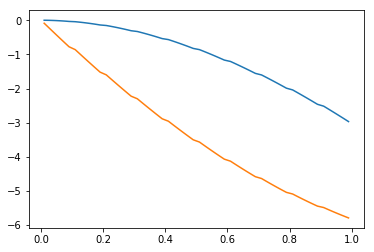

[[ -4.39403050e-04  -8.78227560e-02]
 [ -1.75525021e-03  -1.75286173e-01]
 [ -3.94390435e-03  -2.62382941e-01]
 [ -7.00166289e-03  -3.49105833e-01]
 [ -1.09247511e-02  -4.35447685e-01]
 [ -1.57093230e-02  -5.21401402e-01]
 [ -2.13514619e-02  -6.06959956e-01]
 [ -2.78471815e-02  -6.92116384e-01]
 [ -3.51924261e-02  -7.76863794e-01]
 [ -4.33830612e-02  -8.61195344e-01]
 [ -5.24149347e-02  -9.45104348e-01]
 [ -6.22837357e-02  -1.02858403e+00]
 [ -7.29851597e-02  -1.11162781e+00]
 [ -8.45148157e-02  -1.19422914e+00]
 [ -9.68682467e-02  -1.27638153e+00]
 [ -1.10040932e-01  -1.35807859e+00]
 [ -1.24028282e-01  -1.43931398e+00]
 [ -1.38825652e-01  -1.52008144e+00]
 [ -1.54428322e-01  -1.60037475e+00]
 [ -1.70831562e-01  -1.68018786e+00]]
Length of state 90
356


In [265]:
# Physics
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

class Pid:
    def __init__(self):
        self.int = 0
        

    def PidController(self, x, r = 1):
        error = r - x
        self.int += 1
        output = error
        return output*100

pid = Pid()
def ElevatorPhysics(state, t):
    # State vector.
    x = state[0]
    x_dot = state[1]

    # Mass of elevator in kg.
    m = 100.0
    # Acceleration of gravity.
    g = -9.8
    
    F = pid.PidController(x)

    x_dot_dot = g + F/m - x_dot*0.4

    # Output state derivatives.
    return [x_dot, x_dot_dot]


state_initial = [0.0, 0.0]
last_time = 0.0
increment = 0.01
step_time = 0.1
total_state = np.array([[0,0]])
total_state = np.delete(total_state, 0, axis=0)
total_time = np.array([0])
total_time = np.delete(total_time, 0, axis=0)

for time in np.arange(step_time,1+step_time, step_time):
    t = np.arange(last_time, time-0.005, increment) # 0.005 is to avoid floating point rounding
    state = odeint(ElevatorPhysics, state_initial, t)
    state_initial = state[-1]
    
    total_time = np.append(total_time, t[1:])
    total_state = np.append(total_state, state[1:], axis=0)
    last_time = time
    
plt.plot(total_time,total_state)
plt.show()
print(total_state[0:20])
print('Length of state',len(total_state))
print(pid.int)

110
[[  0.00000000e+00   0.00000000e+00]
 [ -4.39403050e-04  -8.78227560e-02]
 [ -1.75525021e-03  -1.75286173e-01]
 [ -3.94390435e-03  -2.62382941e-01]
 [ -7.00166289e-03  -3.49105833e-01]
 [ -1.09247511e-02  -4.35447685e-01]
 [ -1.57093230e-02  -5.21401402e-01]
 [ -2.13514619e-02  -6.06959956e-01]
 [ -2.78471815e-02  -6.92116384e-01]
 [ -3.51924261e-02  -7.76863794e-01]
 [ -4.33830712e-02  -8.61195361e-01]
 [ -5.24149246e-02  -9.45104329e-01]
 [ -6.22837268e-02  -1.02858401e+00]
 [ -7.29851518e-02  -1.11162779e+00]
 [ -8.45148078e-02  -1.19422911e+00]
 [ -9.68682377e-02  -1.27638151e+00]
 [ -1.10040920e-01  -1.35807857e+00]
 [ -1.24028270e-01  -1.43931396e+00]
 [ -1.38825640e-01  -1.52008142e+00]
 [ -1.54428318e-01  -1.60037475e+00]]

[[-3.5642971  -6.10614281]
 [-3.62549699 -6.13371412]
 [-3.68696897 -6.16056322]
 [-3.74870584 -6.18669031]
 [-3.81070037 -6.21209568]
 [-3.87294535 -6.23677967]
 [-3.93543356 -6.26074269]
 [-3.9981578  -6.28398523]
 [-4.06111086 -6.30650785]]


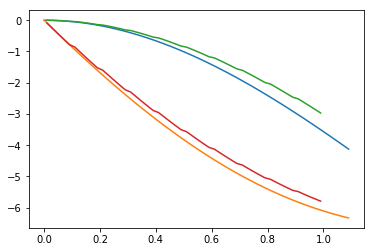

In [283]:
state_initial = [0.0, 0.0]
t = np.arange(0, 1.1, 0.01)
state = odeint(ElevatorPhysics, state_initial, t)
print(len(state))
print(state[0:20])
print('')
print(state[-10:-1])

plt.plot(t,state)
plt.plot(total_time, total_state)
plt.show()

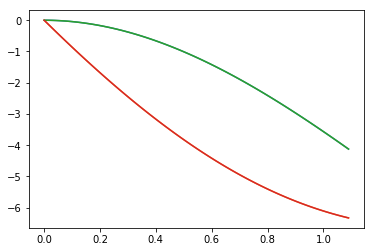

In [282]:
from scipy.integrate import ode

pid = Pid()
def ElevatorPhysics2(t, state):
    # State vector.
    x = state[0]
    x_dot = state[1]

    # Mass of elevator in kg.
    m = 100.0
    # Acceleration of gravity.
    g = -9.8
    
    F = pid.PidController(x)

    x_dot_dot = g + F/m - x_dot*0.4

    # Output state derivatives.
    return [x_dot, x_dot_dot]

solver = ode(ElevatorPhysics2)
solver.set_integrator('dop853')

# Give the value of omega to the solver. This is passed to
# `fun` when the solver calls it.
#omega = 2 * np.pi
#solver.set_f_params(omega)

# Set the initial value z(0) = z0.
t0 = 0.0
state_initial = [0.0, 0.0]
solver.set_initial_value(state_initial, t0)

# Create the array `t` of time values at which to compute
# the solution, and create an array to hold the solution.
# Put the initial value in the solution array.
t1 = 1.1 - 0.01
sol = np.zeros((int(1.1/0.01), 2))
sol[0] = state_initial

# Repeatedly call the `integrate` method to advance the
# solution to time t[k], and save the solution in sol[k].
k = 1
while solver.successful() and solver.t < t1:
    solver.integrate(t[k])
    sol[k] = solver.y
    k += 1
    

plt.plot(t, sol)
plt.plot(t, state)
plt.show()